In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

# 1. Preparación Dataset

In [2]:
data = pd.read_csv("data.csv")

In [3]:
tf_count = data["Categoria"].value_counts()
tf_count

Categoria
1    36267
0    26705
Name: count, dtype: int64

In [4]:
data_procesada = data.drop(columns=["id", "Topico", "Fuente", "URL"])
data_procesada

,Categoria,Titulo,Texto,Fecha,Origen
0,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...,19/04/2022,Vigo
1,1,La Abogacía del Estado se retira como acusació...,"En un escrito, la abogada del Estado Rosa Marí...",17/09/2021,Vigo
2,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...,12/09/2022,Vigo
3,1,Sánchez defiende 'resolver el problema' de la ...,Resulta evidente que la ley ha tenido algunos ...,07/02/2023,Vigo
4,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupó un puesto simbólic...",12/04/2023,Vigo
...,...,...,...,...,...
62967,0,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,NaN,Posadas
62968,1,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",NaN,Posadas
62969,0,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,NaN,Posadas
62970,0,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,NaN,Posadas


In [5]:
data_procesada['Noticia'] = data_procesada['Titulo'].fillna('').str.upper() + '\n' + data_procesada['Texto']
data_procesada

,Categoria,Titulo,Texto,Fecha,Origen,Noticia
0,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...,19/04/2022,Vigo,MORENO INTENTA APACIGUAR EL FLANCO SANITARIO M...
1,1,La Abogacía del Estado se retira como acusació...,"En un escrito, la abogada del Estado Rosa Marí...",17/09/2021,Vigo,LA ABOGACÍA DEL ESTADO SE RETIRA COMO ACUSACIÓ...
2,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...,12/09/2022,Vigo,LAS PROMESAS INCUMPLIDAS DE PABLO ECHENIQUE EN...
3,1,Sánchez defiende 'resolver el problema' de la ...,Resulta evidente que la ley ha tenido algunos ...,07/02/2023,Vigo,SÁNCHEZ DEFIENDE 'RESOLVER EL PROBLEMA' DE LA ...
4,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupó un puesto simbólic...",12/04/2023,Vigo,IAN GIBSON CIERRA LA LISTA ELECTORAL DE LA CON...
...,...,...,...,...,...,...
62967,0,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,NaN,Posadas,MADONNA SERÁ LA NUEVA IMAGEN DEL CHOCOLATE ABU...
62968,1,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",NaN,Posadas,"FILTRAN MATERIAL ÍNTIMO DE ZELINA VEGA, LUCHAD..."
62969,0,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,NaN,Posadas,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...
62970,0,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,NaN,Posadas,TV AZTECA ANUNCIA QUE CAMBIARÁ SU NOMBRE POR U...


# 2. Modelo

In [6]:
import re
from stop_words import get_stop_words

In [7]:
stop_words_es = get_stop_words('es')
puntuaciones = "'.,;:\"()[]{}\\/?!-_*'"

def quitar_stop_words(texto):
    words = texto.split()
    result_words = [word for word in words if (word not in stop_words_es and word not in puntuaciones)]
    resultado = ' '.join(result_words)
    return resultado

def clean_comments(corpus):
    patt1 = re.compile('\d')
    patt2 = re.compile('\W')
    patt3 = re.compile('  *')

    corpus = corpus.lower()
    corpus = patt1.sub('', corpus)
    corpus = patt2.sub(' ', corpus)
    corpus = patt3.sub(' ', corpus)
    corpus = quitar_stop_words(corpus)
    return corpus

In [8]:
data_procesada['Texto_Limpio'] = data_procesada['Noticia'].apply(lambda x: clean_comments(x))

In [9]:
corpus = data_procesada['Texto_Limpio'].values
corpus[0]

'moreno intenta apaciguar flanco sanitario mientras enreda fecha elecciones presidente abre puerta comicios junio domingo'

In [10]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
tknzr.tokenize(corpus[0])

['moreno',
 'intenta',
 'apaciguar',
 'flanco',
 'sanitario',
 'mientras',
 'enreda',
 'fecha',
 'elecciones',
 'presidente',
 'abre',
 'puerta',
 'comicios',
 'junio',
 'domingo']

In [11]:
corpus_tk = []
for i in corpus:
    corpus_tk.append(tknzr.tokenize(i))

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(corpus_tk, min_count=50, window=5, vector_size=100)
X = model.wv.vectors
X

array([[ 2.1244340e+00, -6.9285142e-01,  9.4761625e-02, ...,
        -2.5595531e-01, -2.8565320e-01,  6.2159866e-01],
       [ 4.9742797e-01, -1.9662074e+00, -9.5536590e-01, ...,
         2.0786424e+00, -2.2949703e+00,  3.9375376e-02],
       [-1.6098732e-01, -1.3249791e+00, -1.4522636e+00, ...,
         4.2534092e-01,  1.7634921e+00, -2.1014661e-01],
       ...,
       [-1.7429497e-03,  1.2247086e-01, -1.2635246e-01, ...,
        -2.8364980e-01, -1.0613856e-01,  8.8665329e-02],
       [-2.5607330e-01, -1.6306050e-01,  2.1400176e-01, ...,
        -2.6865312e-01,  1.9881894e-01,  9.7877949e-02],
       [-2.9207391e-01,  2.8283575e-01, -1.3865244e-01, ...,
        -4.5414236e-01, -2.7998003e-01, -3.5597327e-01]], dtype=float32)

Text(0.5, 0, 'PCA Components')

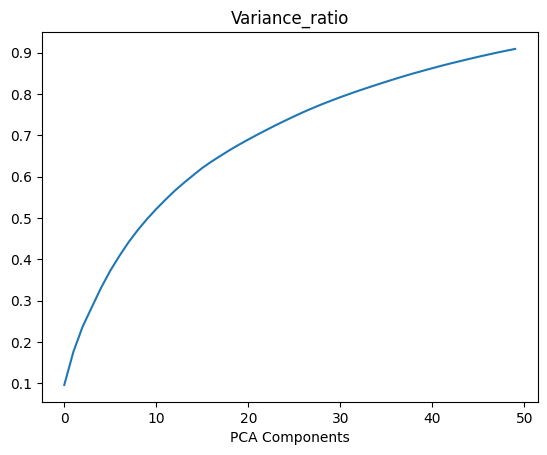

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, svd_solver='full')
pca.fit(X)
plt.plot((pca.explained_variance_ratio_).cumsum())
plt.title('Variance_ratio')
plt.xlabel('PCA Components')


In [14]:
pca = PCA(n_components=30, svd_solver='full')
pca.fit(X)

PCA(n_components=30, svd_solver='full')

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=30)
TF_IDF = vectorizer.fit_transform(corpus)

In [16]:
TF_IDF.toarray().shape

(62972, 8235)

In [17]:
tf_idf = vectorizer.vocabulary_
tf_idf

{'moreno': 5084,
 'intenta': 4245,
 'sanitario': 7049,
 'mientras': 4979,
 'fecha': 3384,
 'elecciones': 2751,
 'presidente': 6058,
 'abre': 34,
 'puerta': 6343,
 'comicios': 1510,
 'junio': 4433,
 'domingo': 2636,
 'abogacía': 20,
 'retira': 6828,
 'acusación': 173,
 'pieza': 5820,
 'iberdrola': 3917,
 'caso': 1215,
 'tándem': 7760,
 'escrito': 3005,
 'abogada': 21,
 'rosa': 6940,
 'maría': 4857,
 'argumenta': 632,
 'decisión': 2178,
 'falta': 3357,
 'activa': 126,
 'respecto': 6787,
 'delitos': 2249,
 'imputados': 4013,
 'promesas': 6214,
 'pablo': 5504,
 'echenique': 2686,
 'sanidad': 7046,
 'educación': 2708,
 'vivienda': 8079,
 'lunes': 4710,
 'martes': 4852,
 'asamblea': 673,
 'madrid': 4732,
 'acogerá': 102,
 'debate': 2141,
 'región': 6653,
 'último': 8227,
 'celebró': 1281,
 'hace': 3784,
 'dos': 2646,
 'años': 850,
 'septiembre': 7140,
 'sánchez': 7441,
 'defiende': 2216,
 'resolver': 6775,
 'problema': 6153,
 'ley': 4563,
 'solo': 7287,
 'diálogo': 2618,
 'resulta': 6818,
 '

In [18]:
import numpy as np

X = np.zeros((data_procesada.shape[0], 30))
for i,corp in enumerate(corpus):
    vect = np.zeros(100)
    for num,word in enumerate(corp.split(' ')):
        try:
            vect += model[word]*TF_IDF[i,tf_idf[word]]
        except:
            pass
    if num != 0:
        vect = vect/num
    else:
        vect = vect * 0
    vect = vect.reshape(1,100)
    vect_pca = pca.transform(vect)
    X[i,:]=vect_pca

In [19]:
Y = data_procesada['Categoria'].values

tt = int(0.9 * len(X))
X_train, X_test = X[:tt], X[tt:]
y_train, y_test = Y[:tt], Y[tt:]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn import svm

best_kernel = 0
best_degree = 0
best_gamma = 0
best_C = 0
best_accuracy = 0

kernels = ['rbf', 'sigmoid', 'poly']
degrees = [1, 2, 3, 4, 5]
gammas = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]
values_of_C = [1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0, 1.0e+1, 1.0e+2, 1.0e+3]
coef0 = 1.0

print("Probando hiperparametros")
for kernel in kernels:
    if kernel == 'poly':
        _degrees = degrees
    else:
        _degrees = [1]
    for degree in degrees:
        for gamma in gammas:
            for C in values_of_C:
                classifier = svm.SVC(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, C=C, max_iter=100)
                classifier.fit(X_train, y_train)
                y_pred = classifier.predict(X_test)

                accuracy = (100 * (y_test == y_pred).sum()) / (len(y_test))

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_kernel = kernel
                    best_gamma = gamma
                    best_C = C
                    best_degree = degree
                print(" %-7s degree %3d gamma %.6f C %e accuracy %.1f%%" % (kernel, degree, gamma, C, accuracy))
print("La mejor combinación es: %-7s degree %3d gamma %.6f C %e accuracy %.1f%%" % (best_kernel, best_degree, best_gamma, best_C, best_accuracy))

Probando hiperparametros


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   1 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   2 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   3 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   4 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 rbf     degree   5 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   1 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   2 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   3 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   4 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e-04 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e-02 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e-01 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 sigmoid degree   5 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   1 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   2 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   3 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   4 gamma 2.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.000100 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.001000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.010000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 0.100000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e+02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 1.000000 C 1.000000e+03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e-04 accuracy 48.3%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e-02 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e-01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e+00 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e+01 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 poly    degree   5 gamma 2.000000 C 1.000000e+02 accuracy 51.7%
 poly    degree   5 gamma 2.000000 C 1.000000e+03 accuracy 51.7%
La mejor combinación es: rbf     degree   1 gamma 0.000100 C 1.000000e-03 accuracy 51.7%


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
